In [685]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [686]:
retail_clean = pd.read_csv("/Users/dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_9/retail_clean.csv")

In [687]:
retail_clean.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [688]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [689]:
retail_clean.InvoiceDate

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                 ...         
779490    2011-12-09 12:50:00
779491    2011-12-09 12:50:00
779492    2011-12-09 12:50:00
779493    2011-12-09 12:50:00
779494    2011-12-09 12:50:00
Name: InvoiceDate, Length: 779495, dtype: object

In [690]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])

In [691]:
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [692]:
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [693]:
retail_clean['year'] = retail_clean['date'].dt.year
retail_clean['month'] = retail_clean['date'].dt.month
retail_clean['week'] = retail_clean['date'].dt.week


/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [694]:
retail_clean.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue,year,month,week
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821,2010.432050,7.417110,30.126300
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962,0.568394,3.422346,14.840159
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000,2009.000000,1.000000,1.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000,2010.000000,5.000000,18.000000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000,2010.000000,8.000000,33.000000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000,2011.000000,11.000000,44.000000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000,2011.000000,12.000000,52.000000


In [695]:
time_series = retail_clean.groupby(['week', 'month', 'year']).agg(date=('date', 'first'), 
                                                                  total_revenue=('Revenue', 'sum')
                                                                 ).reset_index().sort_values('date')

In [696]:
time_series.head()

,week,month,year,date,total_revenue
113,49,12,2009,2009-12-01,232177.51
116,50,12,2009,2009-12-07,207908.73
118,51,12,2009,2009-12-14,207685.87
120,52,12,2009,2009-12-21,35731.90
0,1,1,2010,2010-01-04,167636.95


<AxesSubplot:xlabel='date', ylabel='total_revenue'>

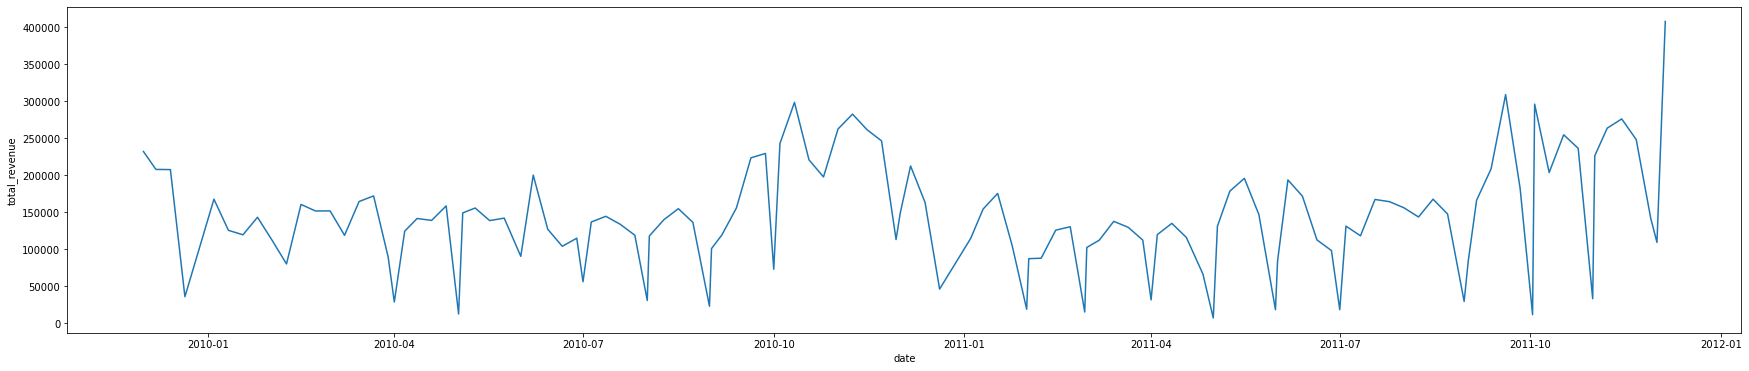

In [697]:
fig, ax = plt.subplots(figsize=(30,6))
sns.lineplot(x='date', y='total_revenue', data=time_series)

In [698]:
from sklearn.linear_model import LinearRegression

In [699]:
time_series['trend'] = range(time_series.shape[0])

In [700]:
time_series['month'] = time_series['month'].astype('category')

In [701]:
time_series

,week,month,year,date,total_revenue,trend
113,49,12,2009,2009-12-01,232177.51,0
116,50,12,2009,2009-12-07,207908.73,1
118,51,12,2009,2009-12-14,207685.87,2
120,52,12,2009,2009-12-21,35731.90,3
0,1,1,2010,2010-01-04,167636.95,4
...,...,...,...,...,...,...
106,46,11,2011,2011-11-14,276216.98,116
108,47,11,2011,2011-11-21,248234.58,117
110,48,11,2011,2011-11-28,141669.57,118
112,48,12,2011,2011-12-01,109163.47,119


In [702]:
X = time_series.drop(['week', 'year', 'date', 'total_revenue'], axis=1)

In [703]:
X

,month,trend
113,12,0
116,12,1
118,12,2
120,12,3
0,1,4
...,...,...
106,11,116
108,11,117
110,11,118
112,12,119


In [704]:
names = pd.get_dummies(X).columns

In [705]:
names

Index(['trend', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [706]:
X = pd.get_dummies(X).values

In [707]:
X

array([[  0,   0,   0, ...,   0,   0,   1],
       [  1,   0,   0, ...,   0,   0,   1],
       [  2,   0,   0, ...,   0,   0,   1],
       ...,
       [118,   0,   0, ...,   0,   1,   0],
       [119,   0,   0, ...,   0,   0,   1],
       [120,   0,   0, ...,   0,   0,   1]])

In [708]:
y = time_series.total_revenue.values

In [709]:
y

array([232177.51      , 207908.73      , 207685.87      ,  35731.9       ,
       167636.95      , 125493.61      , 119473.351     , 143198.761     ,
       112299.692     ,  80059.66      , 160506.402     , 151693.202     ,
       151813.96      , 118785.1       , 164459.771     , 172063.68      ,
        89855.96      ,  28646.66      , 124314.76      , 141539.381     ,
       138922.62      , 158558.581     ,  12342.17      , 149102.83      ,
       155673.54      , 138681.57      , 142033.27      ,  90358.06      ,
       200239.71      , 126987.39      , 103924.84      , 114861.13      ,
        55932.44      , 136775.12      , 144495.58      , 133616.        ,
       118917.03      ,  30637.95      , 117866.37      , 139842.07      ,
       154786.91      , 136279.55      ,  22811.75      , 100807.8       ,
       119333.94      , 155778.921     , 223587.04      , 229506.25      ,
        72886.41      , 243007.44      , 298614.04000001, 220882.67      ,
       197721.45      , 2

In [710]:
model = LinearRegression()

In [711]:
model.fit(X,y)
model.coef_

array([-7.50587618e+00, -1.85162279e+04, -3.77331573e+04, -1.42433897e+04,
       -3.72762502e+04, -2.73256065e+04, -1.35913538e+04, -2.43256353e+04,
       -2.98789922e+04,  3.48536846e+04,  4.50119036e+04,  8.92286442e+04,
        3.37963804e+04])

In [712]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [713]:
dict1 = list(zip(names, model.coef_))

In [714]:
dict1

[('trend', -7.505876175663627),
 ('month_1', -18516.227879107577),
 ('month_2', -37733.157332084804),
 ('month_3', -14243.389744275866),
 ('month_4', -37276.25016339746),
 ('month_5', -27325.606453991753),
 ('month_6', -13591.353763553147),
 ('month_7', -24325.63528267498),
 ('month_8', -29878.992237689818),
 ('month_9', 34853.684617170824),
 ('month_10', 45011.90359930485),
 ('month_11', 89228.64421701827),
 ('month_12', 33796.38042328141)]

In [715]:
prediction = model.predict(X)

In [716]:
prediction

array([177476.05181929, 177468.54594311, 177461.04006693, 177453.53419076,
       125133.42001219, 125125.91413602, 125118.40825984, 125110.90238367,
       105886.46705451, 105878.96117834, 105871.45530216, 105863.94942599,
       129346.21113762, 129338.70526144, 129331.19938527, 129323.69350909,
       129316.18763292, 106275.82133762, 106268.31546145, 106260.80958527,
       106253.30370909, 106245.79783292, 116188.93566615, 116181.42978997,
       116173.9239138 , 116166.41803762, 116158.91216145, 129885.65897571,
       129878.15309953, 129870.64722336, 129863.14134718, 129855.63547101,
       119113.84807571, 119106.34219953, 119098.83632336, 119091.33044718,
       119083.82457101, 113522.96173982, 113515.45586364, 113507.94998746,
       113500.44411129, 113492.93823511, 113485.43235894, 178210.60333762,
       178203.09746145, 178195.59158527, 178188.08570909, 178180.57983292,
       188331.29293888, 188323.7870627 , 188316.28118653, 188308.77531035,
       188301.26943417, 2

In [717]:
time_series['prediction'] = prediction

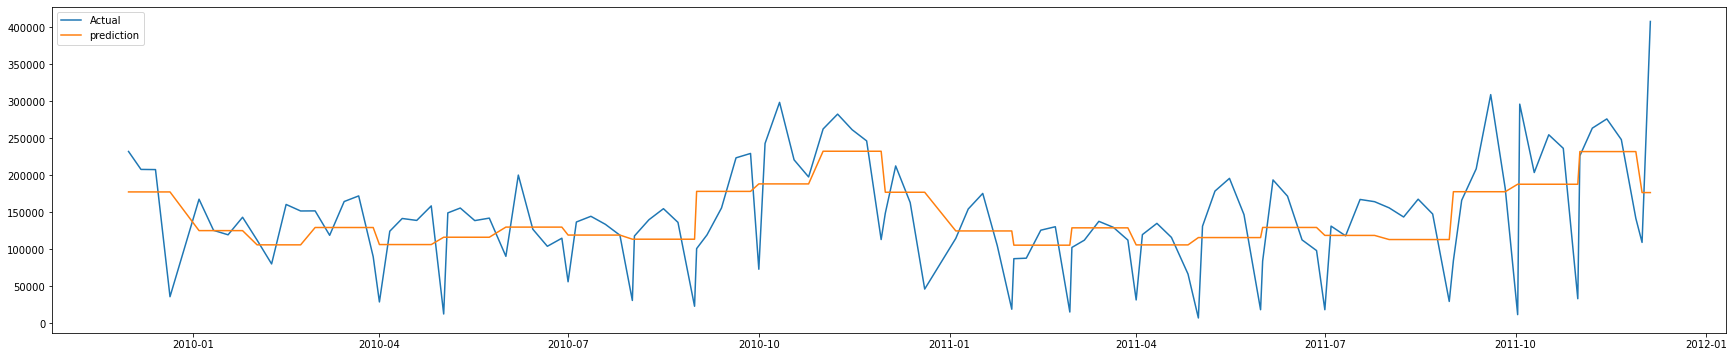

In [718]:
fig, ax = plt.subplots(figsize=(30,6))
plt.plot(time_series.date, time_series.total_revenue, label='Actual')
plt.plot(time_series.date, time_series.prediction, label='prediction')
plt.legend(loc='upper left')
plt.show()

In [719]:
time_series.to_csv('./time_series.csv', index=False)

In [720]:
#### forecasting
max_date = time_series.date.max()

In [721]:
dates = pd.DataFrame({'date': pd.date_range('2011-12-12', '2012-02-5', freq='W')})

In [722]:
dates

,date
0,2011-12-18
1,2011-12-25
2,2012-01-01
3,2012-01-08
4,2012-01-15
5,2012-01-22
6,2012-01-29
7,2012-02-05


In [723]:
time_series = pd.concat([time_series, dates], axis=0)

In [724]:
# time_series['date'] = pd.to_datetime(time_series['date'])
time_series['trend'] = range(time_series.shape[0])

In [725]:
time_series.date.max()

Timestamp('2012-02-05 00:00:00')

In [726]:
np.unique(time_series['month'])

array([1, 2, 3, nan, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, nan, 1, 2, 3, 4, 5,
       6, 7, nan, nan, nan, 6, 7, 8, 9, 10, 11, nan, 11, 12, nan, nan],
      dtype=object)

In [727]:
time_series.describe()

,week,year,total_revenue,trend,prediction
count,121.000000,121.000000,121.000000,129.000000,121.000000
mean,26.603306,2010.454545,143593.423702,64.000000,143593.423702
std,14.808488,0.562731,72769.820728,37.383151,38982.212536
min,1.000000,2009.000000,6958.110000,0.000000,105413.596855
25%,14.000000,2010.000000,109163.470000,32.000000,115701.053715
50%,26.000000,2010.000000,138922.620000,64.000000,128865.835062
75%,39.000000,2011.000000,175452.230000,96.000000,177730.227262
max,52.000000,2011.000000,408044.970000,128.000000,232510.504176


In [728]:
time_series

,week,month,year,date,total_revenue,trend,prediction
113,49.0,12,2009.0,2009-12-01,232177.51,0,177476.051819
116,50.0,12,2009.0,2009-12-07,207908.73,1,177468.545943
118,51.0,12,2009.0,2009-12-14,207685.87,2,177461.040067
120,52.0,12,2009.0,2009-12-21,35731.90,3,177453.534191
0,1.0,1,2010.0,2010-01-04,167636.95,4,125133.420012
...,...,...,...,...,...,...,...
3,NaN,NaN,NaN,2012-01-08,NaN,124,NaN
4,NaN,NaN,NaN,2012-01-15,NaN,125,NaN
5,NaN,NaN,NaN,2012-01-22,NaN,126,NaN
6,NaN,NaN,NaN,2012-01-29,NaN,127,NaN


In [729]:
np.unique(time_series['date'])

array(['2009-12-01T00:00:00.000000000', '2009-12-07T00:00:00.000000000',
       '2009-12-14T00:00:00.000000000', '2009-12-21T00:00:00.000000000',
       '2010-01-04T00:00:00.000000000', '2010-01-11T00:00:00.000000000',
       '2010-01-18T00:00:00.000000000', '2010-01-25T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-02-08T00:00:00.000000000',
       '2010-02-15T00:00:00.000000000', '2010-02-22T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-03-08T00:00:00.000000000',
       '2010-03-15T00:00:00.000000000', '2010-03-22T00:00:00.000000000',
       '2010-03-29T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-04-06T00:00:00.000000000', '2010-04-12T00:00:00.000000000',
       '2010-04-19T00:00:00.000000000', '2010-04-26T00:00:00.000000000',
       '2010-05-02T00:00:00.000000000', '2010-05-04T00:00:00.000000000',
       '2010-05-10T00:00:00.000000000', '2010-05-17T00:00:00.000000000',
       '2010-05-24T00:00:00.000000000', '2010-06-01

In [730]:
time_series['month'] = time_series['date'].dt.month

In [731]:
time_series['month'] = time_series['month'].astype('category')

In [732]:
X= time_series.drop(['week','year','date','total_revenue'],axis=1)

In [733]:
names=pd.get_dummies(X).columns

In [734]:
X= pd.get_dummies(X).values

In [735]:
X

array([[0.00000000e+00, 1.77476052e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.77468546e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.77461040e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.26000000e+02,            nan, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27000000e+02,            nan, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28000000e+02,            nan, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [736]:
y= time_series.total_revenue.values

In [737]:
print(len(X))
print(len(y))

129
129


In [738]:
y

array([232177.51      , 207908.73      , 207685.87      ,  35731.9       ,
       167636.95      , 125493.61      , 119473.351     , 143198.761     ,
       112299.692     ,  80059.66      , 160506.402     , 151693.202     ,
       151813.96      , 118785.1       , 164459.771     , 172063.68      ,
        89855.96      ,  28646.66      , 124314.76      , 141539.381     ,
       138922.62      , 158558.581     ,  12342.17      , 149102.83      ,
       155673.54      , 138681.57      , 142033.27      ,  90358.06      ,
       200239.71      , 126987.39      , 103924.84      , 114861.13      ,
        55932.44      , 136775.12      , 144495.58      , 133616.        ,
       118917.03      ,  30637.95      , 117866.37      , 139842.07      ,
       154786.91      , 136279.55      ,  22811.75      , 100807.8       ,
       119333.94      , 155778.921     , 223587.04      , 229506.25      ,
        72886.41      , 243007.44      , 298614.04000001, 220882.67      ,
       197721.45      , 2

In [739]:

prediction= model.predict(X)

time_series['prediction']= prediction

plt.plot(time_series.date,time_series.total_revenue,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').